# Simple SIFT (Scale-Invariant Feature Transform)

- SIFT (Scale-Invariant Feature Transform) is a feature detection and description algorithm that identifies distinctive keypoints in an image, invariant to scale, rotation, and illumination changes.

- We will use the CIFAR dataset

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

### Load CIFAR-10 dataset

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Select two images from the dataset

In [4]:

image1 = x_train[0]  # First image in the training set
image2 = x_train[1]  # Second image in the training set

### Resize CIFAR images for better feature detection


In [5]:
image1_resized = cv2.resize(image1, (256, 256))
image2_resized = cv2.resize(image2, (256, 256))

### Convert to grayscale (SIFT works on grayscale images)

In [6]:

gray1 = cv2.cvtColor(image1_resized, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

### Detect keypoints and descriptors using SIFT

In [7]:




sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

### Match descriptors using FLANN-based matcher


In [8]:
flann = cv2.FlannBasedMatcher(dict(algorithm=1, trees=5), dict(checks=50))
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

### Apply Lowe's ratio test to filter good matches

In [9]:

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

### Draw matches & isualize result

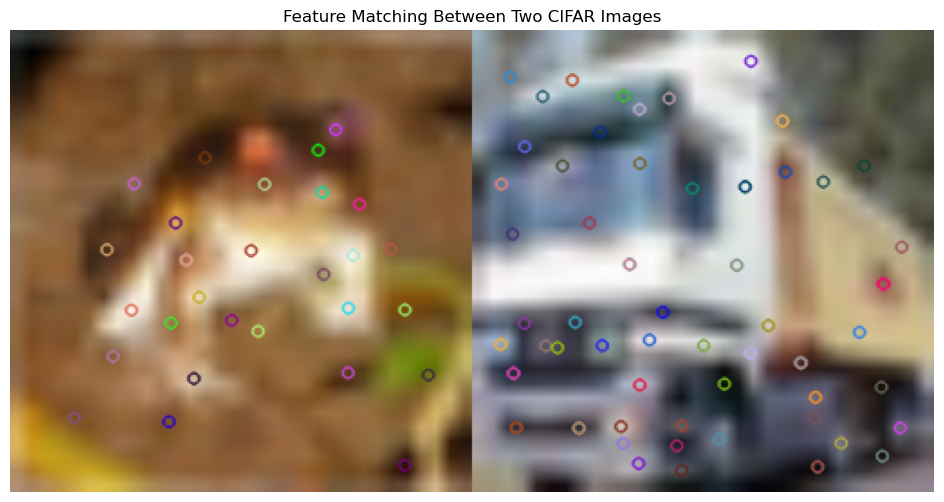

In [10]:
matched_image = cv2.drawMatches(image1_resized, keypoints1, image2_resized, keypoints2, good_matches, None)

plt.figure(figsize=(12, 6))
plt.imshow(matched_image)
plt.axis("off")
plt.title("Feature Matching Between Two CIFAR Images")
plt.show()
